In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import datetime

from uszipcode import SearchEngine,Zipcode

import random
import scipy.stats as stats

import holidays

%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

colors = mcolors.TABLEAU_COLORS

import warnings
warnings.filterwarnings("ignore")

# Data import

#### Import station data  
the station dta file contains 76 stations

In [2]:
station_data = pd.read_csv('data/station_data.csv')
print(station_data.shape)

(76, 6)


In [3]:
station_data.tail()

,Id,Name,Lat,Long,Dock Count,City
71,77,Market at Sansome,37.789625,-122.400811,27,San Francisco
72,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose
73,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco
74,83,Mezes Park,37.491269,-122.236234,15,Redwood City
75,84,Ryland Park,37.342725,-121.895617,15,San Jose


In [4]:
print(station_data.dtypes)

Id              int64
Name           object
Lat           float64
Long          float64
Dock Count      int64
City           object
dtype: object


In [5]:
station_data.isnull().sum()

Id            0
Name          0
Lat           0
Long          0
Dock Count    0
City          0
dtype: int64

#### import trip data  
Trip data consist of over 350K records and no missing data

In [6]:
trip_data = pd.read_csv('data/trip_data.csv')
trip_data.shape

(354152, 6)

In [7]:
trip_data.head()

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer


In [8]:
trip_data.dtypes

Trip ID             int64
Start Date         object
Start Station       int64
End Date           object
End Station         int64
Subscriber Type    object
dtype: object

In [9]:
trip_data.isnull().sum()

Trip ID            0
Start Date         0
Start Station      0
End Date           0
End Station        0
Subscriber Type    0
dtype: int64

#### Import weather data

In [10]:
weather_data = pd.read_csv('data/weather_data.csv')
weather_data.shape

(1825, 24)

In [11]:
weather_data.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0.0,0.0,NaN,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0.0,5.0,NaN,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0.0,4.0,NaN,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0.0,5.0,NaN,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0.0,4.0,NaN,309.0,94107


In [12]:
print(weather_data.dtypes)

Date                          object
Max TemperatureF             float64
Mean TemperatureF            float64
Min TemperatureF             float64
Max Dew PointF               float64
MeanDew PointF               float64
Min DewpointF                float64
Max Humidity                 float64
Mean Humidity                float64
Min Humidity                 float64
Max Sea Level PressureIn     float64
Mean Sea Level PressureIn    float64
Min Sea Level PressureIn     float64
Max VisibilityMiles          float64
Mean VisibilityMiles         float64
Min VisibilityMiles          float64
Max Wind SpeedMPH            float64
Mean Wind SpeedMPH           float64
Max Gust SpeedMPH            float64
PrecipitationIn              float64
CloudCover                   float64
Events                        object
WindDirDegrees               float64
Zip                            int64
dtype: object


In [13]:
# print percentage of missing values
weather_data.isnull().mean()*100

Date                          0.000000
Max TemperatureF              0.219178
Mean TemperatureF             0.219178
Min TemperatureF              0.219178
Max Dew PointF                2.739726
MeanDew PointF                2.739726
Min DewpointF                 2.739726
Max Humidity                  2.739726
Mean Humidity                 2.739726
Min Humidity                  2.739726
Max Sea Level PressureIn      0.054795
Mean Sea Level PressureIn     0.054795
Min Sea Level PressureIn      0.054795
Max VisibilityMiles           0.273973
Mean VisibilityMiles          0.273973
Min VisibilityMiles           0.273973
Max Wind SpeedMPH             0.054795
Mean Wind SpeedMPH            0.054795
Max Gust SpeedMPH            29.643836
PrecipitationIn               0.054795
CloudCover                    0.054795
Events                       84.273973
WindDirDegrees                0.054795
Zip                           0.000000
dtype: float64

# Feature engineering

First we link all three data sets to leverage all information contained.  
1) add city names to the trip data  
2)  We start by including zip codes in the station_data in order to link the station info to the weather information.

In [14]:
def get_city_name(x):
    return station_data[station_data.Id == x].City.values[0]

trip_data["Pick_up_city"] = trip_data["Start Station"].apply(lambda x: get_city_name(x))
trip_data["Drop_off_city"] = trip_data["End Station"].apply(lambda x: get_city_name(x))

2) Create variables based on date fields in trip data. 
- create time depedent variable
    - days of week,  
    - hour of day (the hour variable was created bu setting the time to the top of he hour)
    - month (we can also include season as another possible level)
- create other variables t determine weekdays, weekends and bank holidays  


In [15]:
trip_data["Start_Date_time"] =  pd.to_datetime(trip_data["Start Date"], dayfirst=True)
trip_data["End_Date_time"] =  pd.to_datetime(trip_data["End Date"], dayfirst=True)

trip_data["Start_Date"] =  trip_data["Start_Date_time"].dt.date
trip_data["End_Date"] =  trip_data["End_Date_time"].dt.date

trip_data['Start_month'] = trip_data['Start_Date_time'].dt.month
trip_data['Start_weekday'] = trip_data['Start_Date_time'].dt.dayofweek
trip_data['Start_hour'] = trip_data['Start_Date_time'].dt.hour

trip_data['End_month'] = trip_data['End_Date_time'].dt.month
trip_data['End_weekday'] = trip_data['End_Date_time'].dt.dayofweek
trip_data['End_hour'] = trip_data['End_Date_time'].dt.hour

trip_data['is_weekend_start'] = trip_data.Start_weekday.isin([5,6])*1
trip_data['is_weekend_end'] = trip_data.End_weekday.isin([5,6])*1

# Reset date time to top of the hour
trip_data["Start_Date_hour"] = trip_data['Start_Date_time'].values.astype('<M8[h]')
trip_data["End_Date_hour"] = trip_data['End_Date_time'].values.astype('<M8[h]')


In [16]:
import holidays
holidays =  holidays.US(state='CA', years=[2014,2015])

weekDays = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}

def set_holidays_to_7(x, holidays=holidays):
    if x in holidays:
        return 7
    else:
        return x.weekday()
            
def set_names(x, holidays=holidays):
    return weekDays[x.weekday()]

def check_holidays(x, holidays=holidays):
    if x in holidays:
        return True
    else:
        return False

def check_business_day(x, holidays=holidays):
    if x in holidays or x.weekday() in [5,6]:
        return False
    else:
        return True

trip_data["holiday"] = trip_data["Start_Date"].apply(lambda x: check_holidays(x))
trip_data["Business_day"] = trip_data["Start_Date"].apply(lambda x: check_business_day(x))
trip_data["Start_weekday_no"] = trip_data["Start_Date"].apply(lambda x: set_holidays_to_7(x))
trip_data["Start_day_name"] = trip_data["Start_Date"].apply(lambda x: set_names(x))

# Exploratory data analysis

### Trips per city/stations  
Our dataset contains 76 stations with over 40% of the stations located in San Francisco

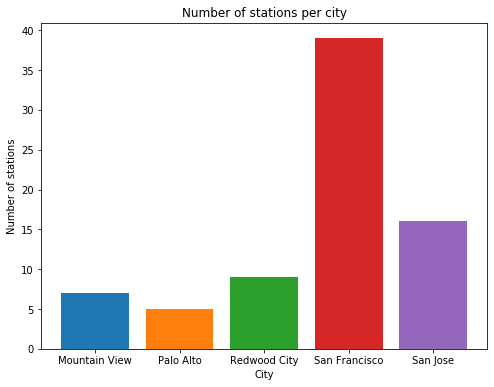

In [17]:
classes = station_data['City'].values
unique, counts = np.unique(classes, return_counts=True)
plt.figure(figsize=(8,6))
plt.bar(unique,counts, color=colors)
plt.title('Number of stations per city')
plt.xlabel('City')
plt.ylabel('Number of stations')
plt.show()

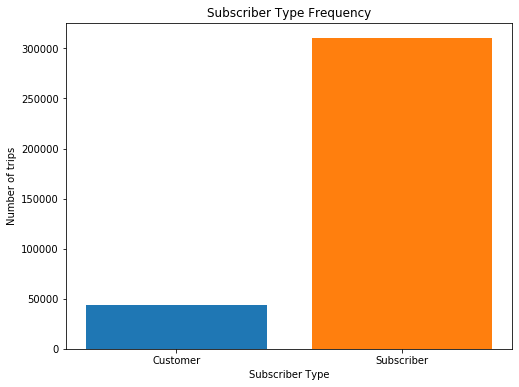

In [18]:
# View the number of trips subscription.
classes = trip_data['Subscriber Type'].values
unique, counts = np.unique(classes, return_counts=True)
plt.figure(figsize=(8,6))
plt.bar(unique,counts, color=colors)
plt.xlabel('Subscriber Type')
plt.ylabel('Number of trips')
plt.title('Subscriber Type Frequency')
plt.show()

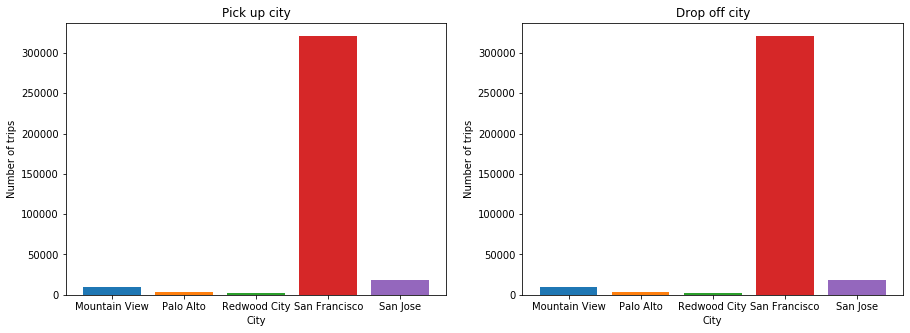

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
classes = trip_data['Pick_up_city'].values
unique, counts = np.unique(classes, return_counts=True)
axes[0].bar(unique,counts, color=colors)
axes[0].set_xlabel('City')
axes[0].set_ylabel('Number of trips')
axes[0].set_title('Pick up city')

classes = trip_data['Drop_off_city'].values
unique, counts = np.unique(classes, return_counts=True)
axes[1].bar(unique,counts, color=colors)
axes[1].set_xlabel('City')
axes[1].set_ylabel('Number of trips')
axes[1].set_title('Drop off city')
plt.show()


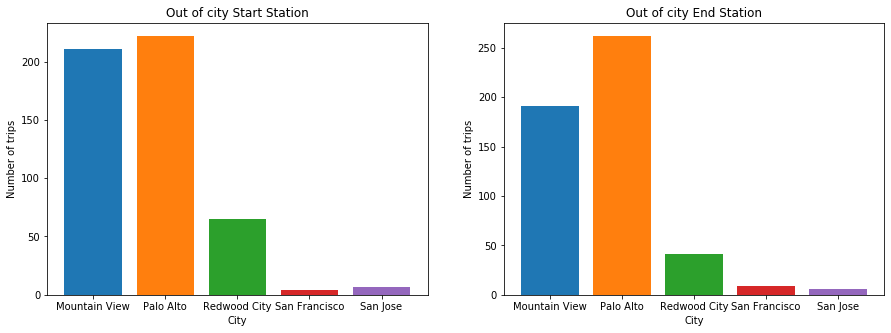

In [20]:
trip_data_out = trip_data.loc[trip_data['Pick_up_city']!= trip_data['Drop_off_city']]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
classes = trip_data_out['Pick_up_city'].values
unique, counts = np.unique(classes, return_counts=True)
axes[0].bar(unique,counts, color=colors)
axes[0].set_xlabel('City')
axes[0].set_ylabel('Number of trips')
axes[0].set_title('Out of city Start Station')

classes = trip_data_out['Drop_off_city'].values
unique, counts = np.unique(classes, return_counts=True)
axes[1].bar(unique,counts, color=colors)
axes[1].set_xlabel('City')
axes[1].set_ylabel('Number of trips')
axes[1].set_title('Out of city End Station')
plt.show()


There are fery few trips that start where the pick up city was different from the drop of city

In [21]:
for city in station_data.City.unique():
    total_trips = trip_data[trip_data.Pick_up_city == city].shape[0]
    num_out_of_city = trip_data_out[trip_data_out.Pick_up_city == city].shape[0]
    ratio = num_out_of_city/total_trips
    print('The percentage of trips from a start station in {} to a different city is {:.3f}% out of total {} trips.'.format
          (city, ratio, total_trips))

The percentage of trips from a start station in San Jose to a different city is 0.000% out of total 17956 trips.
The percentage of trips from a start station in Redwood City to a different city is 0.032% out of total 2019 trips.
The percentage of trips from a start station in Mountain View to a different city is 0.021% out of total 9999 trips.
The percentage of trips from a start station in Palo Alto to a different city is 0.072% out of total 3073 trips.
The percentage of trips from a start station in San Francisco to a different city is 0.000% out of total 321105 trips.


There number of out of city trips are similar for both customer and subscribers.

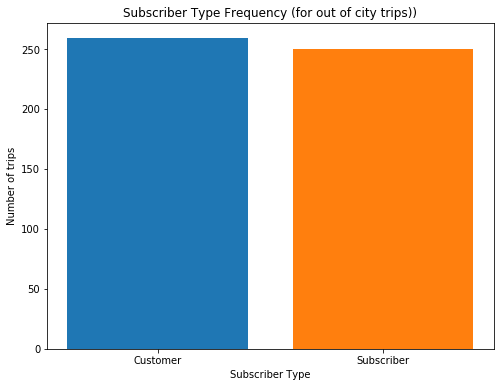

In [22]:
classes = trip_data_out['Subscriber Type'].values
unique, counts = np.unique(classes, return_counts=True)
plt.figure(figsize=(8,6))
plt.bar(unique,counts, color=colors)
plt.title('Subscriber Type Frequency (for out of city trips))')
plt.xlabel('Subscriber Type')
plt.ylabel('Number of trips')
plt.show()

There is not a wide difference between the number of bikes drop off and picked up for each station except in San Francisco Caltrain (Townsend at 4th) where there is a big difference between te number of bikes drop off and those picked up

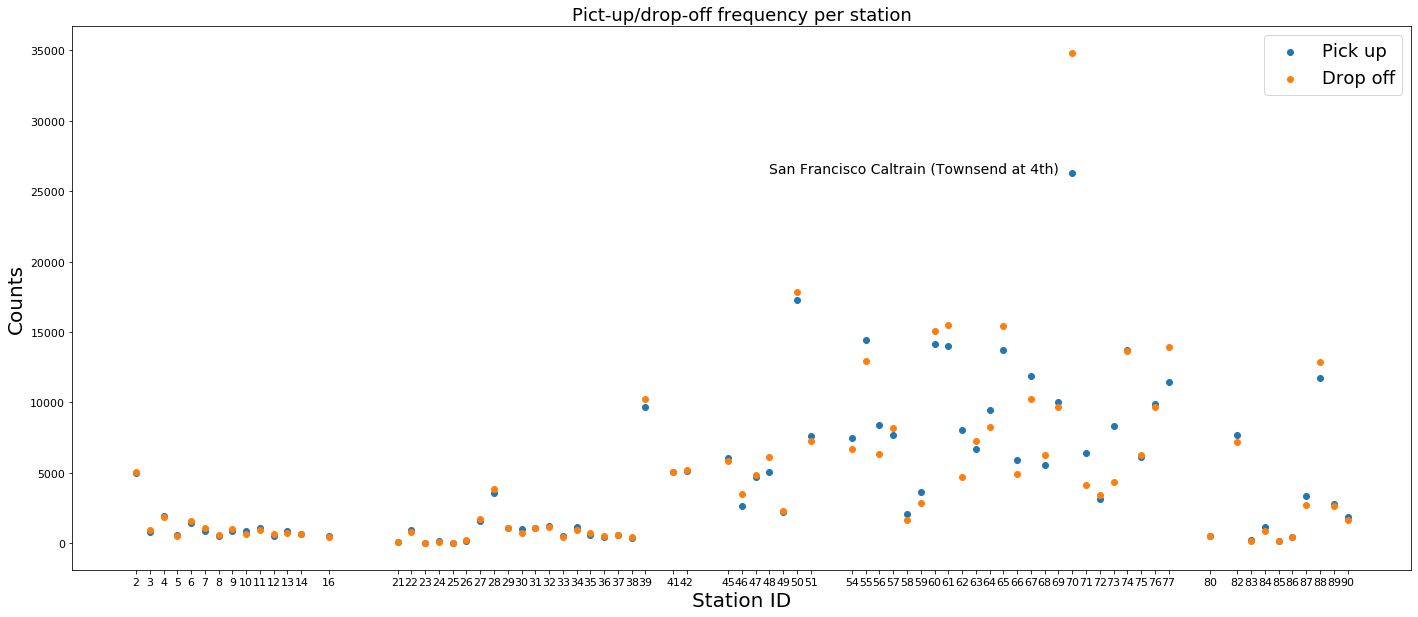

In [23]:
classes = trip_data['Start Station'].values
unique_start, counts_start = np.unique(classes, return_counts=True)
# find index of station greater than 25000 trips
idx = [i for i in range(len(counts_start)) if counts_start[i] > 25000]

idx = [i for i in range(len(counts_start)) if counts_start[i] > 25000]
#counts_start[idx].item()

classes = trip_data['End Station'].values
unique_end, counts_end = np.unique(classes, return_counts=True)

plt.figure(figsize=(24,10))
plt.title('Pict-up/drop-off frequency per station', fontsize=18)
plt.scatter(unique_start,counts_start,label='Pick up')
plt.scatter(unique_end,counts_end, label='Drop off')

plt.text(unique_start[idx].item()-1,counts_start[idx].item() -1,
         station_data[station_data.Id == unique_start[idx].item()].Name.item(),
         horizontalalignment='right', fontsize=14)

plt.xlabel('Station ID', fontsize=20)
plt.ylabel('Counts', fontsize=20)

plt.tick_params(labelsize=11)
plt.xticks(unique_start)
plt.legend(fontsize=18)
plt.show()

The net rate distribution shows that the pick up and drop off varies across stations.  
Some stations seem to get more bike dropped off than they are picked up indicating that the location of the station might be important in predicting the net rental rates.

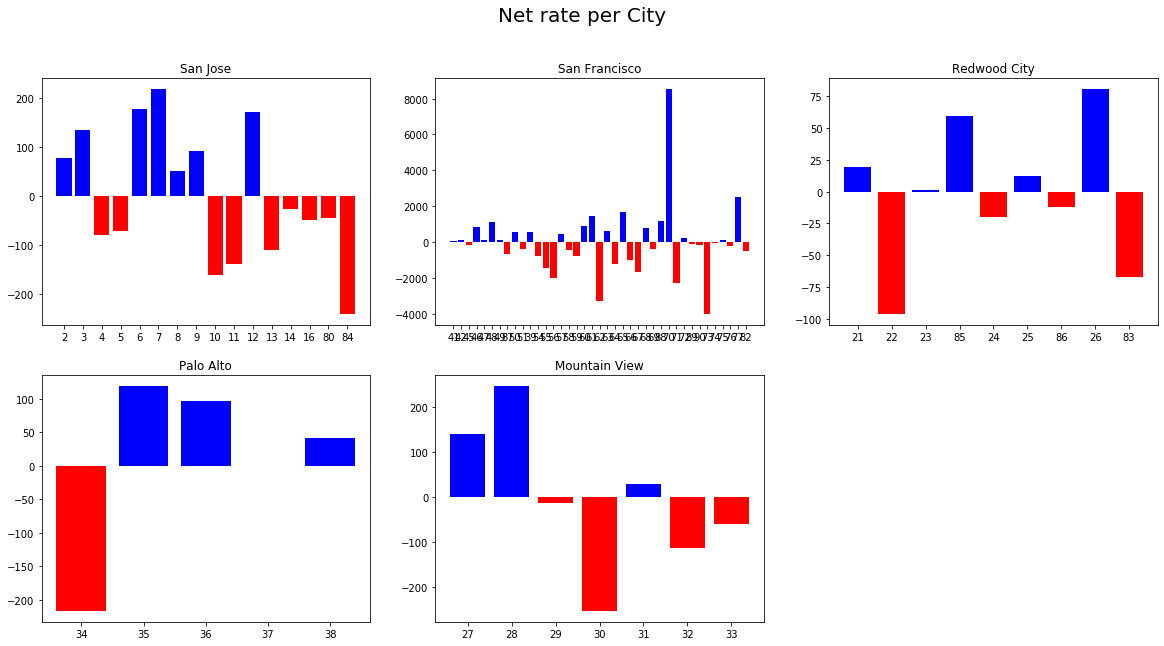

In [24]:
for i, row in station_data.iterrows():
    start_trips = len(trip_data[trip_data['Start Station'] == row.Id])
    end_trips = len(trip_data[trip_data['End Station'] == row.Id])
    station_data.at[i, "net_rate"] = end_trips - start_trips
    
fig = plt.figure(figsize=(20,10))
fig.suptitle('Net rate per City', fontsize=20)

i = 231
for city in set(station_data.City):
    tmp_df = station_data[station_data.City == city]
    pos_signal = tmp_df.net_rate.copy()
    neg_signal = tmp_df.net_rate.copy()
    pos_signal[pos_signal <= 0] = np.nan
    neg_signal[neg_signal > 0] = np.nan
    
    x_pos = [i for i, _ in enumerate(tmp_df.Id)]
    
    ax = fig.add_subplot(i)
    ax.set_title(city)
    ax.bar(x_pos, pos_signal, color='b', align='center')
    ax.bar(x_pos, neg_signal, color='r', align='center')
    plt.xticks(x_pos, tmp_df.Id)
    
    i = i + 1

### Trips by days and hours

In [25]:
print('There are a total of {} business days in the time period under investigation.'
      .format(len(trip_data[trip_data['Business_day']==True].Start_Date.unique())))

print('There are a total of {} days in the time period under investigation.'
      .format(len(trip_data['Start_Date'].unique())))

There are a total of 250 business days in the time period under investigation.
There are a total of 365 days in the time period under investigation.


The number of trips are fairly uniform across the months. The month level aggrgation does not show any evidence of a pattern and is unlikely to be useful in any prediction model

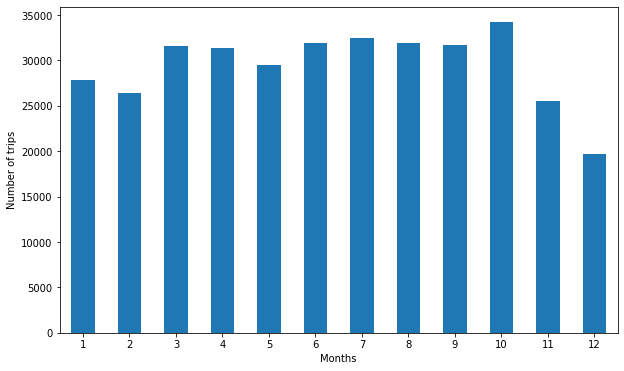

In [26]:
plt.subplots(figsize=(10, 6))
trip_data.groupby('Start_month')['Trip ID'].count().plot('bar')
plt.xlabel("Months")
plt.ylabel("Number of trips")
plt.xticks(rotation='horizontal')
plt.show()

At the aeeek days level we see that the stations are very busy during weekdays (business days) indicating the bikes are mostly used by commutters.  
the usage frequency is over the weekends is on average half of that dring working days. 

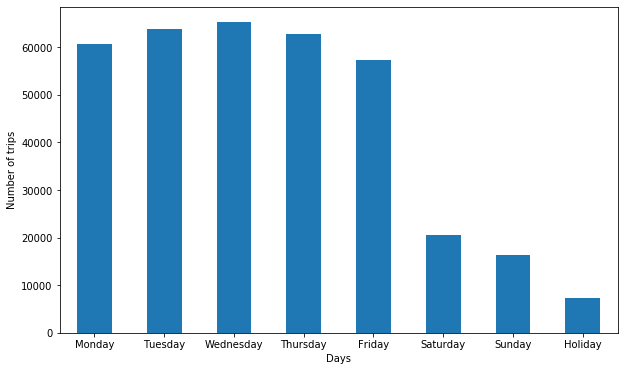

In [27]:
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday", 'Holiday']
val = [0,1,2,3,4,5,6,7]
plt.subplots(figsize=(10, 6))
trip_data.groupby('Start_weekday_no')['Trip ID'].count().plot('bar')
plt.xlabel("Days")
plt.ylabel("Number of trips")
plt.xticks(val, weekDays, rotation='horizontal')
plt.show()

Peak hours are between 6-9AM and 3-6PM which clealy coincides with the time to and from work by commutters.  
We observe similar distributions both for pick up and drop off

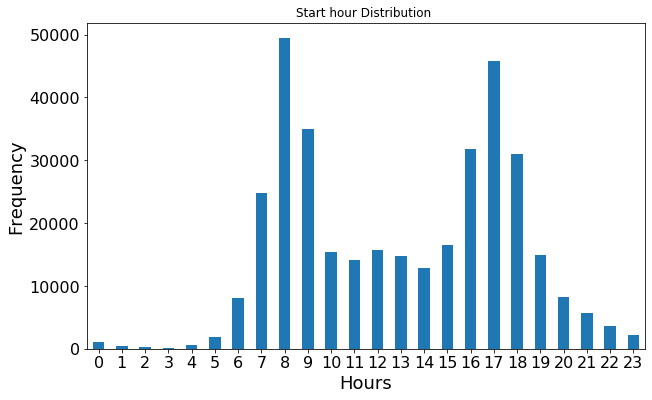

In [28]:
plt.subplots(figsize=(10, 6))
trip_data.groupby('Start_hour')['Trip ID'].count().plot('bar')
plt.title("Start hour Distribution ")
plt.xticks(rotation='horizontal', fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Hours", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

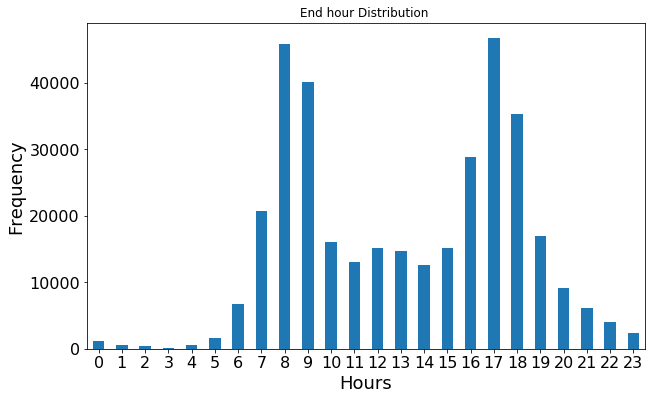

In [29]:
plt.subplots(figsize=(10, 6))
trip_data.groupby('End_hour')['Trip ID'].count().plot('bar')
plt.title("End hour Distribution ")
plt.xticks(rotation='horizontal', fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Hours", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

Ride freqency distribution are similar across all cities for subscribers. While for consumers there is a fairly bell shaped distribution for the all cities except in Redwood city.

In [30]:
def plot_freq_by_subscription(var):
    
    weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    
    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.3, hspace=0.6)
    fig.tight_layout()
    title = 'Trip frequency by ' + var + ' per City'
    fig.suptitle(title, fontsize=20)

    i = 1
    for city in set(station_data.City):
        tmp_trip = trip_data[trip_data.Pick_up_city == city]
        ax = fig.add_subplot(5, 3, i)
        tmp_trip.groupby(var)['Trip ID'].count().plot('bar')
        ax.set_title(city)
        i = i+1
        for subs in set(trip_data['Subscriber Type']):
            tmp_trip = trip_data.loc[(trip_data['Pick_up_city'] == city) & (trip_data['Subscriber Type'] == subs)]
            ax = fig.add_subplot(5, 3, i)
            if 'Start_day' in var:
                tmp_trip.set_index(var).loc[weekDays].groupby(var)['Trip ID'].plot('bar')
            else:
                tmp_trip.groupby(var)['Trip ID'].count().plot('bar')
            
            title2 = city + " (" + subs + ")"
            ax.set_title(title2)
            i = i + 1 

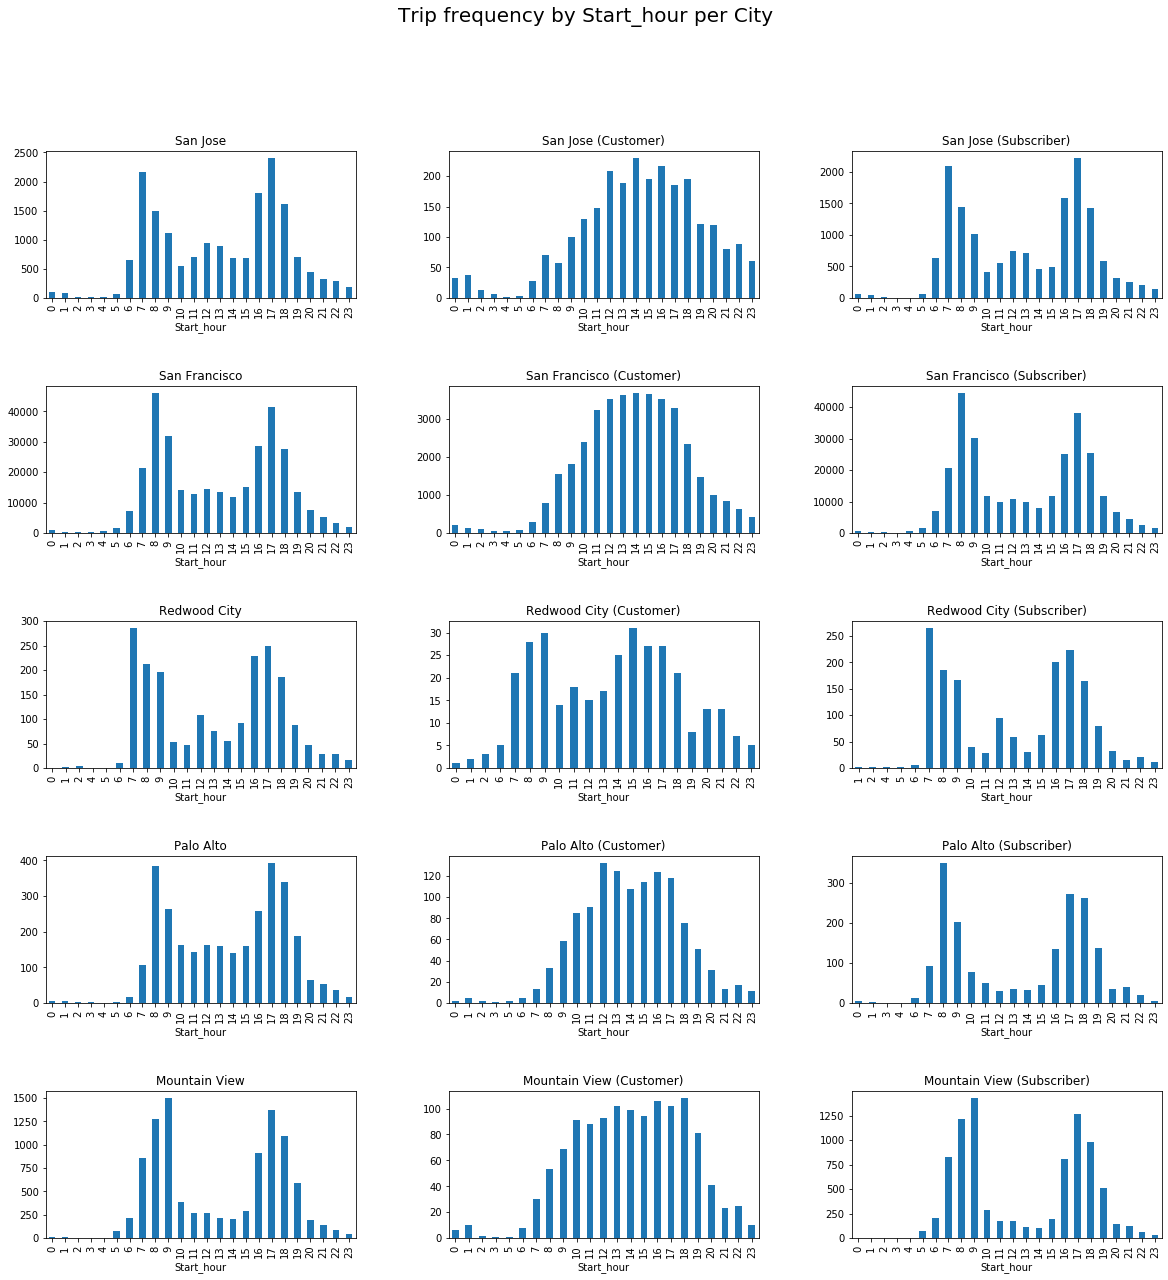

In [31]:
plot_freq_by_subscription('Start_hour') 

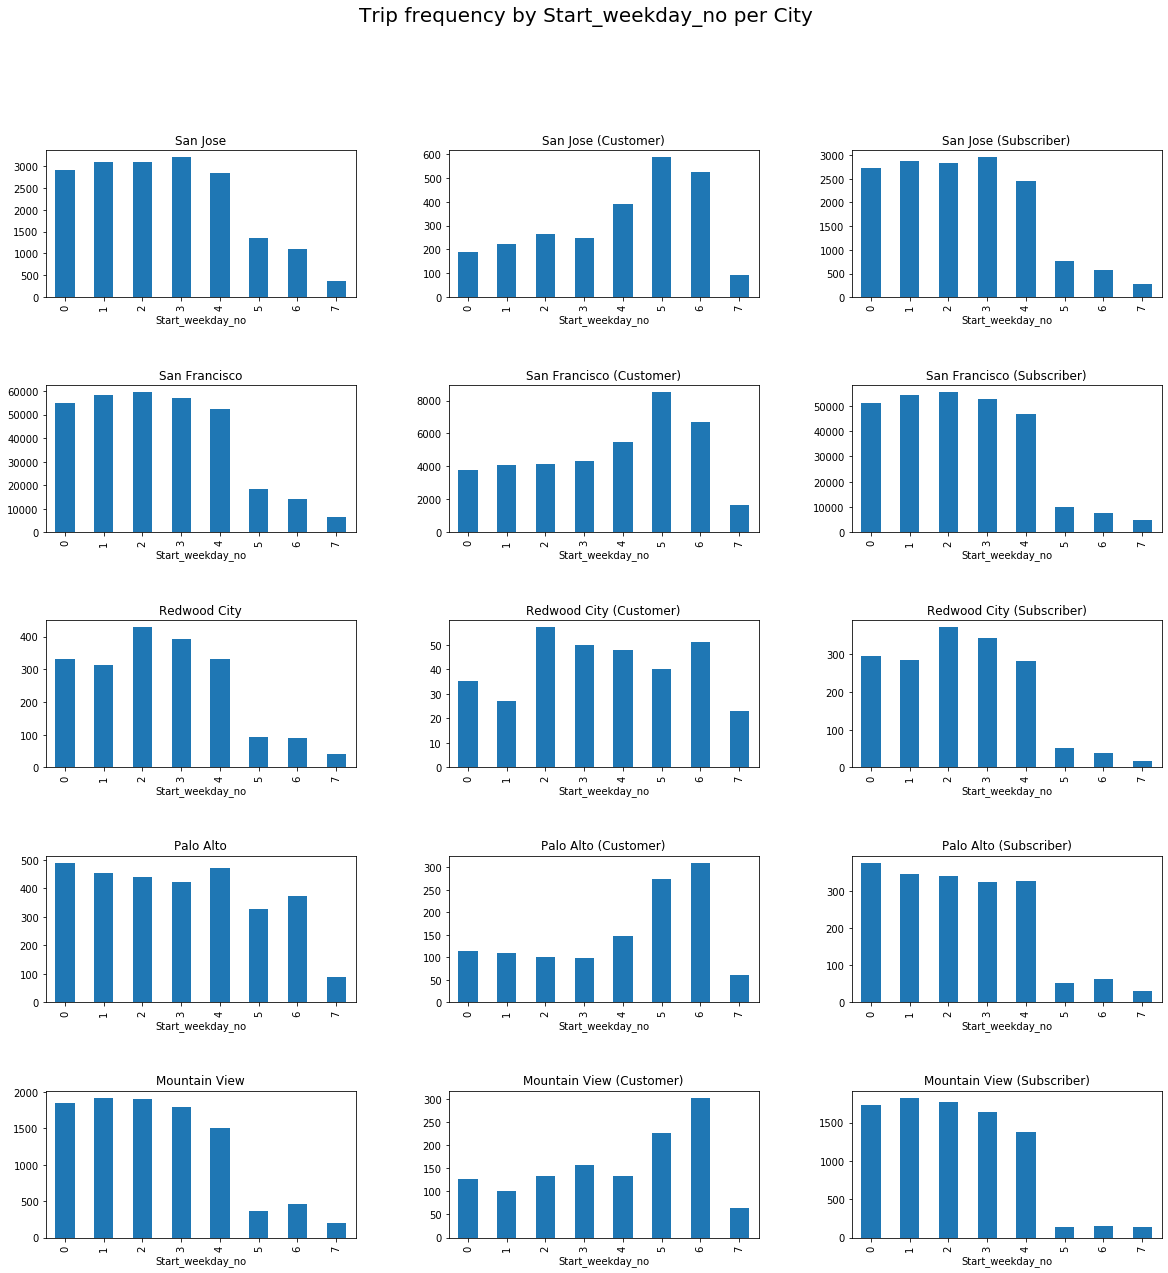

In [32]:
# Day 7 is attributed to all holidays
plot_freq_by_subscription('Start_weekday_no')

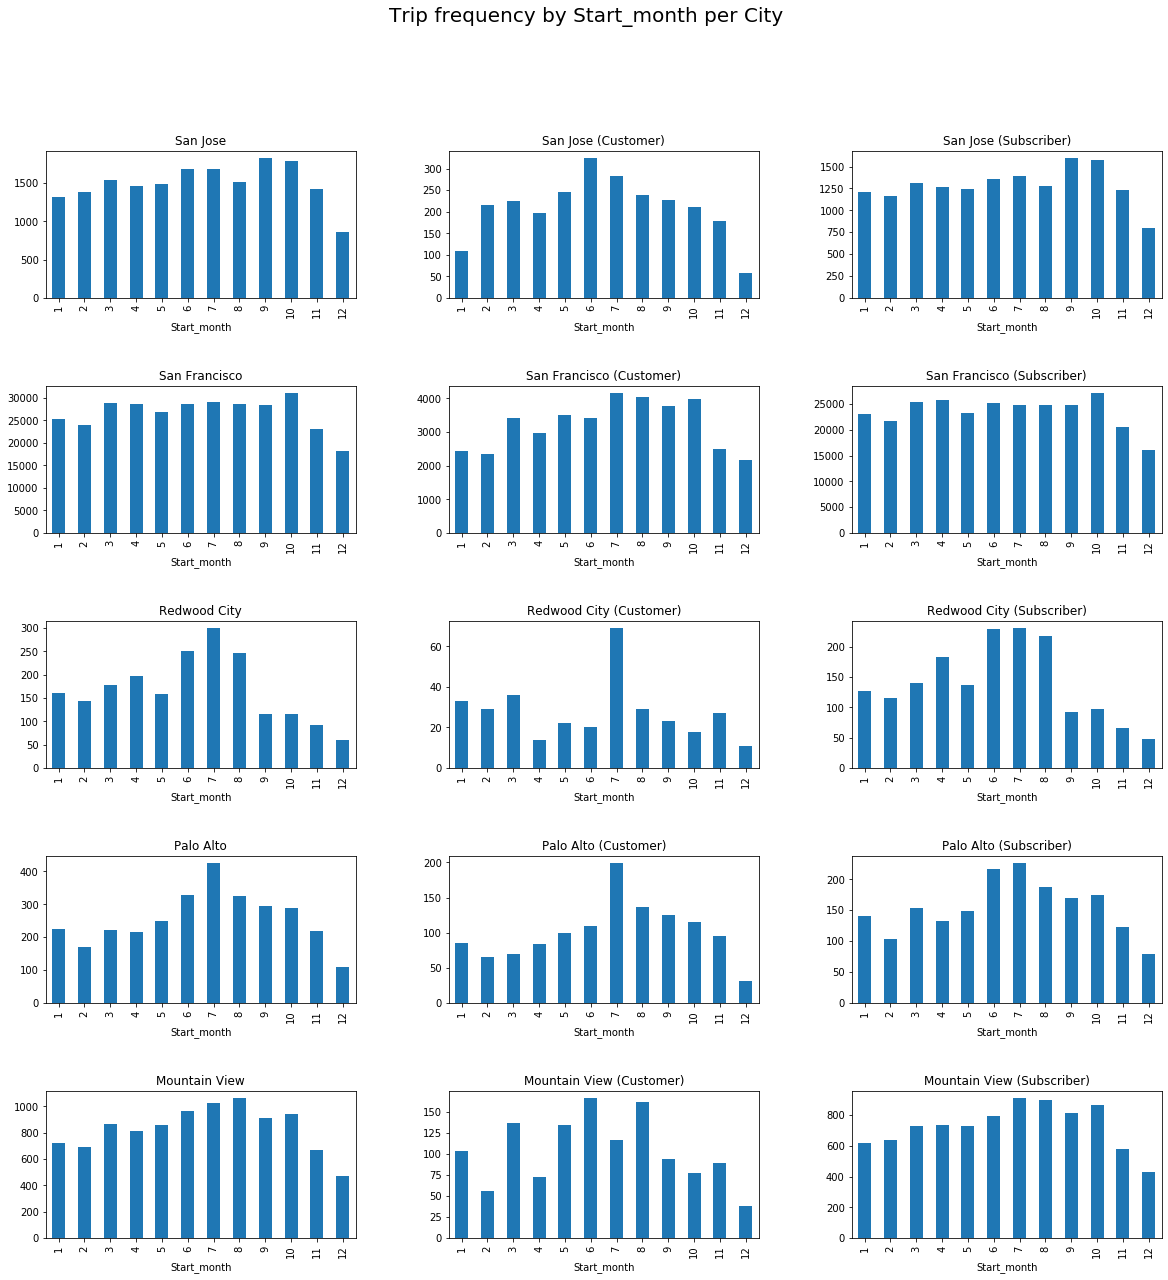

In [33]:
plot_freq_by_subscription('Start_month')

### Rental frequency over time across all stations.  


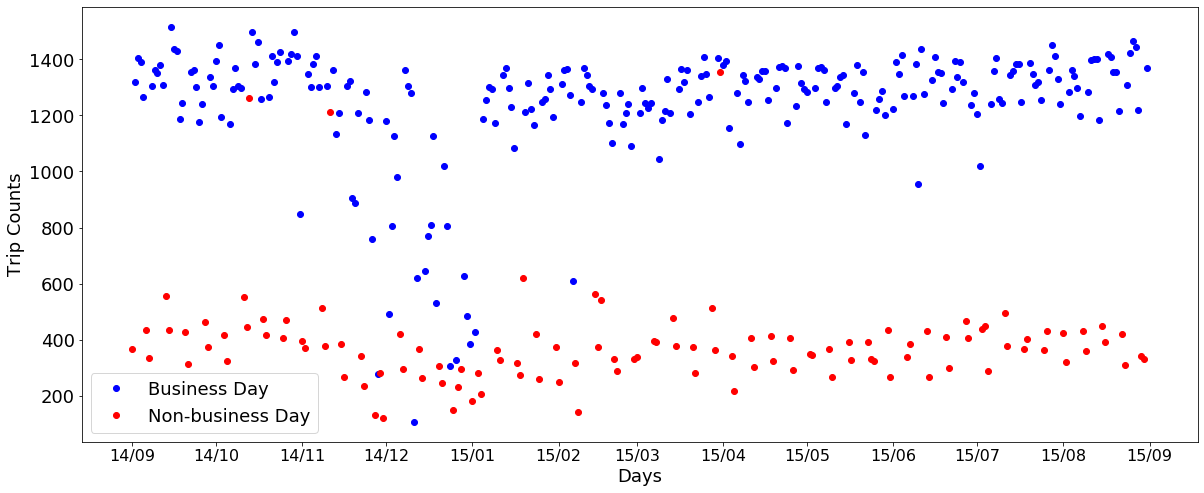

In [34]:
daily_trips = trip_data.groupby('Start_Date').agg({'Business_day': ['median', 'count']})

BDay_trips = daily_trips[daily_trips['Business_day']['median'] == True].reset_index()
nonBDay_trips = daily_trips[daily_trips['Business_day']['median'] == False].reset_index()

fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(BDay_trips.Start_Date, BDay_trips['Business_day']['count'], 'bo', label='Business Day')
plt.plot(nonBDay_trips.Start_Date, nonBDay_trips['Business_day']['count'], 'ro', label='Non-business Day')

months = mdates.MonthLocator()
year_month_Fmt = mdates.DateFormatter('%y/%m')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(year_month_Fmt)

plt.xticks(rotation='horizontal', fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel("Days", fontsize=18)
plt.legend(fontsize=18)
plt.ylabel('Trip Counts', fontsize=18)

plt.show()

### Rental duration  
Average rental duration is about 20 mins (0.3 hour).  
Maximum rental duration is about 200days (4799 hrs).  
Given the distribution of the total duration we can conclude that most rides ranges between 10 mins - a few hours.  
From the distribution and the summary we drop all trips that are more than 2 standard deviations from the mean.

In [35]:
trip_data['Trip_duration'] = trip_data["End_Date_time"] - trip_data["Start_Date_time"]
trip_data['Trip_duration']=trip_data['Trip_duration']/np.timedelta64(1,'h')
#trip_data['Trip_duration']=trip_data['Trip_duration']/np.timedelta64(1,'m')

print(trip_data['Trip_duration'].describe())
print()
print('Average ride time (hours) {} .'.format(trip_data['Trip_duration'].mean()))

count    354152.000000
mean          0.290570
std           8.339547
min           0.016667
25%           0.100000
50%           0.150000
75%           0.200000
max        4798.316667
Name: Trip_duration, dtype: float64

Average ride time (hours) 0.29056968006201694 .


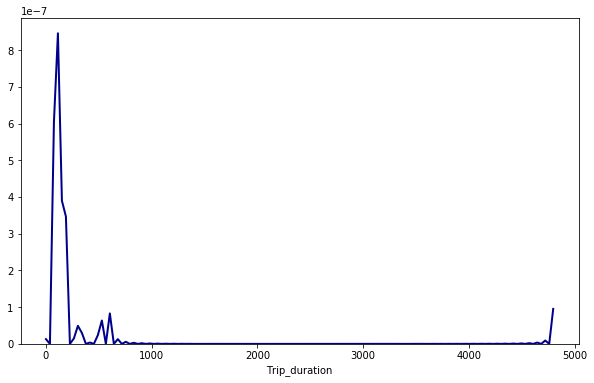

In [36]:
plt.figure(figsize=(10, 6))
sns.distplot(trip_data['Trip_duration'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

Threshold of outlying trips (hours) 16.96966311809138 .


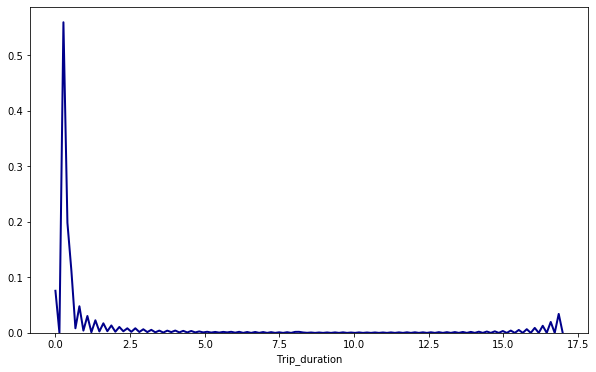

In [37]:
window = trip_data['Trip_duration'].mean() + 2*trip_data['Trip_duration'].std()
print('Threshold of outlying trips (hours) {} .'.format(window))

trip_data_out = trip_data[trip_data['Trip_duration'] <= window]

plt.figure(figsize=(10, 6))
x = trip_data_out.Trip_duration
sns.distplot(x, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

The average trip durations varies between subscribers and customers indicating customers mainly use the bicycles for recreational activities.

In [38]:
trip_duration_subscriber = trip_data[trip_data['Subscriber Type']=='Subscriber'].Trip_duration.mean()
trip_duration_customer = trip_data[trip_data['Subscriber Type']=='Customer'].Trip_duration.mean()

print('The average trip duration for a subscriber is %.1f hours.' % trip_duration_subscriber)
print('The average trip duration for a non-subscriber is %.1f hours.' % trip_duration_customer)

The average trip duration for a subscriber is 0.2 hours.
The average trip duration for a non-subscriber is 1.2 hours.


In [39]:
for city in station_data.City.unique():
    duration = trip_data[trip_data['Pick_up_city']==city].Trip_duration.mean()
    print('The average trip duration for {} is {:.2f}. hours'.format(city, duration))

The average trip duration for San Jose is 0.39. hours
The average trip duration for Redwood City is 0.64. hours
The average trip duration for Mountain View is 0.40. hours
The average trip duration for Palo Alto is 1.18. hours
The average trip duration for San Francisco is 0.27. hours


### Evaluate station change.  
We test for the stations whose loactions where changed to see if there was a significant difference in the net rate between te old and new stations.

In [40]:
trips_changed_station = {}
stations = [23, 25, 49, 69, 72, 85, 86, 87, 88, 89, 90]
hours = set(trip_data.Start_hour)

station_list = []
hour_list = []
trip_start_list = []
trip_end_list = []
net_rate_list = []

for station in stations:
    for hour in range(24):
        trip_start = len(trip_data[(trip_data['Start Station'] == station) & (trip_data['Start_hour'] == hour)])
        trip_end = len(trip_data[(trip_data['End Station'] == station) & (trip_data['End_hour'] == hour)])
        net_rate = trip_end - trip_start
        
        trip_start_list.append(trip_start)
        trip_end_list.append(trip_end)
        station_list.append(station)
        hour_list.append(hour)
        net_rate_list.append(net_rate)
        
# intialise data of lists. 
data = {'Start_station':station_list, 'hour':hour_list, 'trip_starts': trip_start_list, 
        'trip_ends':trip_end_list,'net_rate': net_rate_list} 
df = pd.DataFrame(data) 

There is no significat difference in the net rate between the old and new stations except between stations  49  and  87. Checking on the two stations we observed that station 49 is located abotu 100 meters from 87 hence the difference observe in the net rate distribution is must likely due to effects not captured in the data. 

In [41]:
import scipy.stats as stats
#from scipy.stats import wilcoxon

station_change = {
    23: 85,
    25: 86,
    49: 87,
    69: 88,
    72: 89,
    89: 90,
    90: 72
}

for station1, station2 in station_change.items(): 
    print("Comparison between ", str(station1), " vs ", str(station2))
    group1 = df[df.Start_station == station1].net_rate.tolist()
    group2 = df[df.Start_station == station2].net_rate.tolist()
    u_statistic, pVal = stats.wilcoxon(group1, group2)
    print ('P value: ' + str(pVal))

Comparison between  23  vs  85
P value: 0.2764037330898709
Comparison between  25  vs  86
P value: 0.2389258708769526
Comparison between  49  vs  87
P value: 0.004660882906216393
Comparison between  69  vs  88
P value: 0.573632939085727
Comparison between  72  vs  89
P value: 0.12280812831629039
Comparison between  89  vs  90
P value: 0.7494278026917106
Comparison between  90  vs  72
P value: 0.14394874642569547


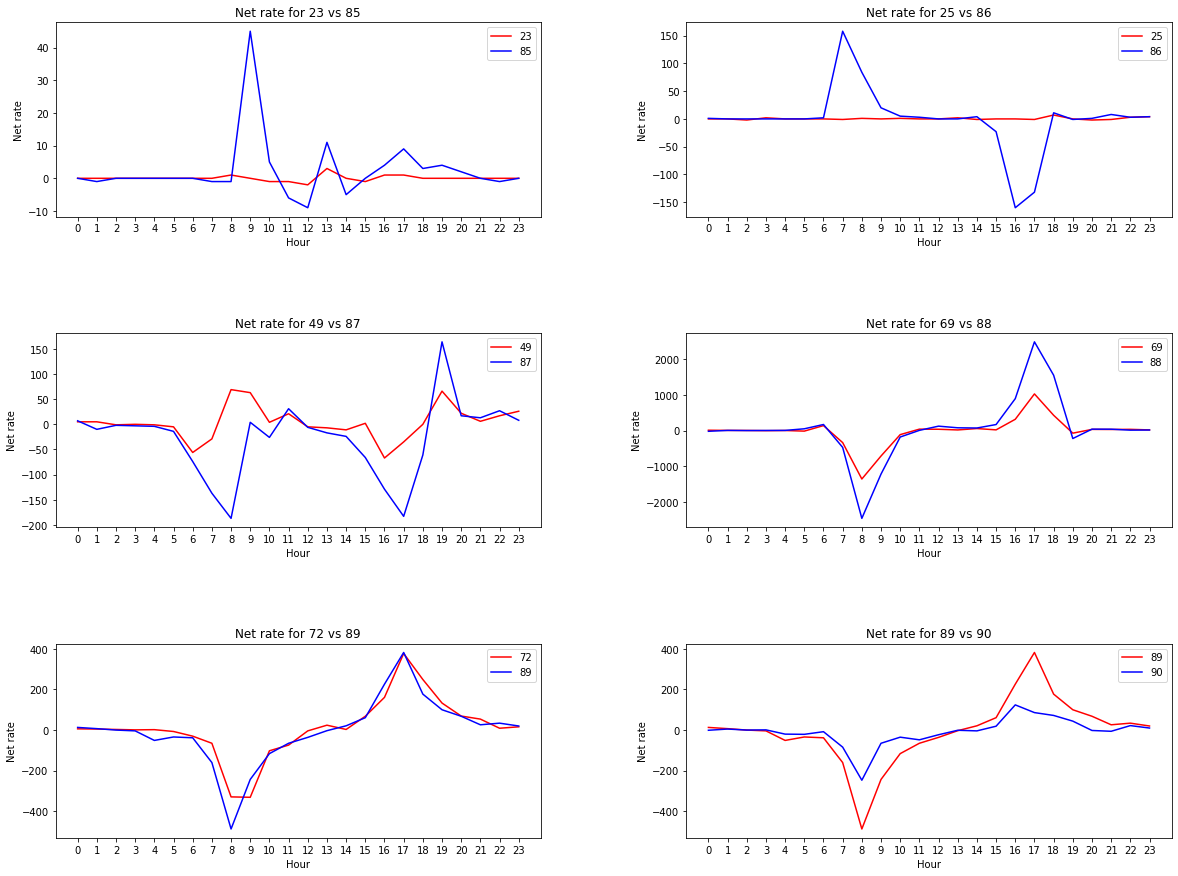

In [42]:
station_change = {
    23: 85,
    25: 86,
    49: 87,
    69: 88,
    72: 89,
    89: 90
}

fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(wspace=0.3, hspace=0.6)
fig.tight_layout()

i = 1
for station1, station2 in station_change.items():
    
    hour = df[df.Start_station == station1].hour.tolist()
    group1 = df[df.Start_station == station1].net_rate.tolist()
    group2 = df[df.Start_station == station2].net_rate.tolist()
    
    ax = fig.add_subplot(3, 2, i)
    title = 'Net rate for ' + str(station1) + ' vs ' + str(station2)
    plt.title(title)
    plt.plot(hour, group1,label=station1, color='r')
    plt.plot(hour, group2,label=station2, color='b')
    plt.xlabel('Hour')
    plt.ylabel('Net rate')
    plt.xticks(hour)
    plt.legend()
    i = i + 1 

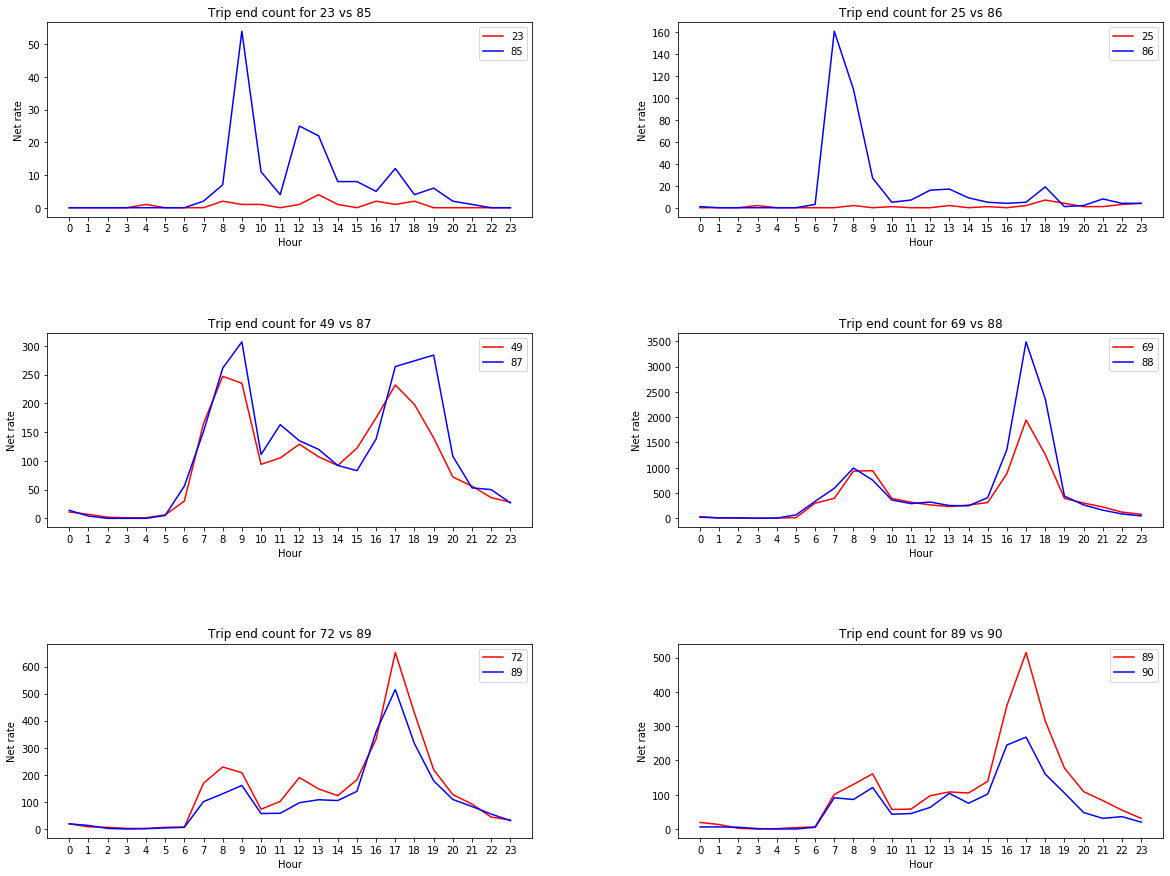

In [43]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(wspace=0.3, hspace=0.6)
fig.tight_layout()

i = 1
for station1, station2 in station_change.items():
    
    hour = df[df.Start_station == station1].hour.tolist()
    group1 = df[df.Start_station == station1].trip_ends.tolist()
    group2 = df[df.Start_station == station2].trip_ends.tolist()
    
    ax = fig.add_subplot(3, 2, i)
    title = 'Trip end count for ' + str(station1) + ' vs ' + str(station2)
    plt.title(title)
    plt.plot(hour, group1,label=station1, color='r')
    plt.plot(hour, group2,label=station2, color='b')
    plt.xlabel('Hour')
    plt.ylabel('Net rate')
    plt.xticks(hour)
    plt.legend()

    i = i + 1 

There in no strong statistically significant evidence that the move station have impact on the net rate distribution. Base on this evidence we replace the old station number with the new station number in the trip data in order to have a complete time series flow for all stations. 

In [44]:
### update station info for moved stations
station_update = {
    23: 85,
    25: 86,
    49: 87,
    69: 88,
    89: 90,
    72: 90
}

def value_to_update(x):
    if x in station_update:
        return station_update[x]
    else:
        return x
    
trip_data["Start Station"] = trip_data["Start Station"].apply(lambda x: value_to_update(x))
trip_data["End Station"] = trip_data["End Station"].apply(lambda x: value_to_update(x))

#### Explore weather data

In [45]:
weather_data["Date_time"] =  pd.to_datetime(weather_data["Date"], dayfirst=True)
weather_data['Date_str'] = weather_data.Date_time.astype(str)
weather_data['Month'] = weather_data['Date_time'].dt.month
weather_data['Weekday'] = weather_data['Date_time'].dt.dayofweek
weather_data["Date_time"] =  pd.to_datetime(weather_data["Date"], dayfirst=True).dt.date

In [46]:
for col in weather_data.columns:
    if pd.api.types.is_numeric_dtype(weather_data[col]):
        weather_data[col].fillna(weather_data.groupby("Zip")[col].transform("mean"), inplace=True)
        

We assume if there is an nan in the event then it is most likely a day without rain fog or Thunderstorm

In [47]:
print(weather_data.Events.unique())
weather_data['Events'].fillna('Clear', inplace=True)

[nan 'Rain' 'Fog' 'Fog-Rain' 'Rain-Thunderstorm']


We assume non gust values imply there was no wind gust and thus we set it to zero

In [48]:
weather_data['Max Gust SpeedMPH'].fillna(0, inplace=True)

Create a correlation table between all the features.

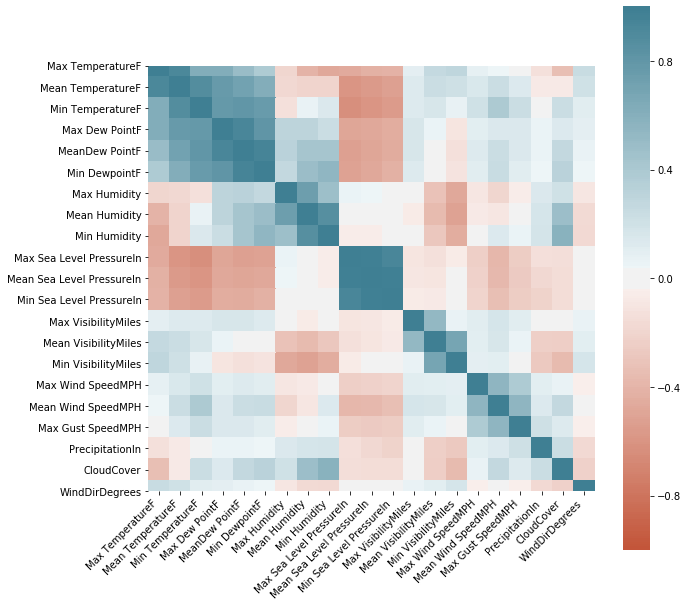

In [49]:
weather_corr_table = weather_data.corr(method='pearson', min_periods=1)
#display(weather_corr_table)

corr_cols = ['Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF','Max Dew PointF', 'MeanDew PointF', 
             'Min DewpointF', 'Max Humidity','Mean Humidity', 'Min Humidity', 'Max Sea Level PressureIn',
             'Mean Sea Level PressureIn', 'Min Sea Level PressureIn','Max VisibilityMiles', 'Mean VisibilityMiles', 
             'Min VisibilityMiles','Max Wind SpeedMPH', 'Mean Wind SpeedMPH', 'Max Gust SpeedMPH','PrecipitationIn', 
             'CloudCover', 'WindDirDegrees']

plt.figure(figsize=(10,10))
corr = weather_data[corr_cols].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [50]:
corr_matrix = weather_data.corr(method='pearson', min_periods=1)
r_squared = 0.5

corr = []
for col in corr_matrix.columns:
    feature = corr_matrix[col]
    corr_cols = feature[(feature.pow(2) > r_squared) & (feature != 1)]
    corr_idx = corr_cols.index.values.tolist()
    corr_dict = {col: corr_idx}
    if corr_idx != []:
        corr.append(corr_dict)

In [51]:
# print correlated columns
display(corr)

[{'Max TemperatureF': ['Mean TemperatureF']},
 {'Mean TemperatureF': ['Max TemperatureF',
   'Min TemperatureF',
   'Max Dew PointF',
   'MeanDew PointF']},
 {'Min TemperatureF': ['Mean TemperatureF',
   'Max Dew PointF',
   'MeanDew PointF',
   'Min DewpointF']},
 {'Max Dew PointF': ['Mean TemperatureF',
   'Min TemperatureF',
   'MeanDew PointF',
   'Min DewpointF']},
 {'MeanDew PointF': ['Mean TemperatureF',
   'Min TemperatureF',
   'Max Dew PointF',
   'Min DewpointF']},
 {'Min DewpointF': ['Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF']},
 {'Max Humidity': ['Mean Humidity']},
 {'Mean Humidity': ['Max Humidity', 'Min Humidity']},
 {'Min Humidity': ['Mean Humidity']},
 {'Max Sea Level PressureIn': ['Mean Sea Level PressureIn',
   'Min Sea Level PressureIn']},
 {'Mean Sea Level PressureIn': ['Max Sea Level PressureIn',
   'Min Sea Level PressureIn']},
 {'Min Sea Level PressureIn': ['Max Sea Level PressureIn',
   'Mean Sea Level PressureIn']}]

As expected there is a very high correlation between the min, mean and max values for each weather measurement. we drop all min and max and use the mean values for temperature measures.(NB: It is possible that the min or max might have better predictive power than t he mean)  
Also there is a significant correlation between temperature and Due point measures  

In [52]:
# remove highly correlated colunns
selected_cols = ['Date', 'Mean TemperatureF', 'Mean Humidity', 'Mean Sea Level PressureIn','Max VisibilityMiles', 
                 'Min VisibilityMiles','Max Wind SpeedMPH', 'Max Gust SpeedMPH','PrecipitationIn', 'CloudCover', 
                 'Events', 'WindDirDegrees', 'Zip','Date_time', 'Date_str', 'Month', 'Weekday']

Plot of the mean temperature by date shows a drastic drop in the temperature between in January which coincides with the month (January) where the rental frequency was at its lowest

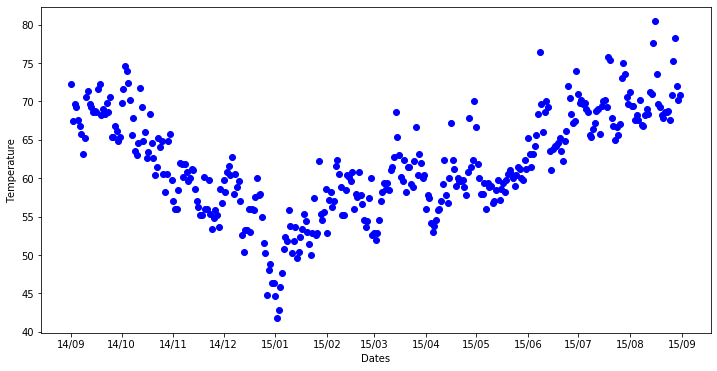

In [53]:
daily_temp = pd.DataFrame(weather_data.groupby('Date')['Mean TemperatureF'].mean())
daily_temp.index = pd.to_datetime(daily_temp.index, dayfirst=True)

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(daily_temp.index, daily_temp['Mean TemperatureF'], 'bo')
months = mdates.MonthLocator()
year_month_Fmt = mdates.DateFormatter('%y/%m')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(year_month_Fmt)
plt.xticks(rotation='horizontal')
plt.xlabel("Dates")
plt.ylabel('Temperature')
plt.show()

### Aggregate the trips over each out to calculate net rate per hour

In [54]:
def bin_time_num(x):
    if x.hour in [6,7,8,9]:
        return datetime.datetime(x.year, x.month, x.day, 1, 0, 0)
    elif x.hour in [10,11,12,13,14]:
        return datetime.datetime(x.year, x.month, x.day, 2, 0, 0)
    elif x.hour in [15,16,17,18,19]:
        return datetime.datetime(x.year, x.month, x.day, 3, 0, 0)
    else:
        return datetime.datetime(x.year, x.month, x.day, 4, 0, 0)

def bin_time(x):
    if x.hour in [6,7,8,9,15,16,17,18,19]:
        return "peak"
    elif x.hour in [10,11,12,13,14]:
        return "low peak"
    else:
        return "off peak"

trip_data["Start_Date_time_bin"] = trip_data["Start_Date_time"].apply(lambda x: bin_time_num(x))
trip_data["End_Date_time_bin"] = trip_data["End_Date_time"].apply(lambda x: bin_time_num(x))

In [55]:
# drop outlining trips
trip_data = trip_data[trip_data['Trip_duration'] <= window]

In [56]:
  
def binary_day(x, holidays=holidays):
    x = pd.to_datetime(x)
    holiday = 0
    bday = 1
    weekday = 1
    
    if x in holidays:
        holiday = 1
    
    if x in holidays or x.weekday in [5,6]:
        bday = 0
        
    if x.weekday in [5,6]:
        weekday = 0
    
    return bday, holiday, weekday

    
def month_day_hour(x):
    #x = x.to_datetime(x)
    return x.month, x.weekday(), x.hour


def aggregate_station_level(trip_df, station_df, weather_df, start_time, end_time):
    
    zipcode = {'Redwood City' : 94063,
               'San Francisco': 94107,
               'Palo Alto': 94301,
               'Mountain View': 94041,
               'San Jose': 95113}

    date_list = []
    station_list = []
    city_list = []
    hour_list = []
    month_list = []
    day_list = []
    net_rate_list = []
    holiday_list = []
    Business_day_list = []
    weekday_list = []
    lat_list = []
    long_list = []
    zip_list = []
    weather_list = []
    
    stations = station_df.Id.unique()
    cities = station_df.City.unique()

    for city in cities:
        for station in stations:
            
            tmp_trip_start = trip_df[(trip_df.Pick_up_city == city) & (trip_df['Start Station'] == station)]
            tmp_trip_end = trip_df[(trip_df.Pick_up_city == city) & (trip_df['End Station'] == station)]
            
            dates = tmp_trip_start[start_time].append(tmp_trip_end[end_time])
            dates = pd.to_datetime(dates.sort_values(ascending=True).unique())           
            
            station_zip = zipcode[station_data[station_data.Id == station].City.values[0]]
        
            for date in dates:
                trip_start = tmp_trip_start[tmp_trip_start[start_time] == date]
                trip_end = tmp_trip_end[tmp_trip_end[end_time] == date]
                
                date_to_str = str(date.date())
                weather_of_day = weather_df[(weather_df['Date_str'].str.contains(date_to_str)) & 
                                              (weather_df.Zip == int(station_zip))]
                try:
                    weather_list.append(weather_of_day.values.tolist()[0])
                except:
                    weather_list.append([])
                
                zip_list.append(station_zip)
                city_list.append(city)
                station_list.append(station)
                
                lat_list.append(station_df[station_df.Id == station].Lat.tolist()[0])
                long_list.append(station_df[station_df.Id == station].Long.tolist()[0])
                date_list.append(pd.to_datetime(date))

                bday, holiday, weekday = binary_day(date)
                Business_day_list.append(bday)
                holiday_list.append(holiday)
                weekday_list.append(weekday)

                net_rate = trip_end.shape[0] - trip_start.shape[0]
                net_rate_list.append(net_rate)
                
                month, day, hour = month_day_hour(date)
                month_list.append(month)
                day_list.append(day)
                hour_list.append(hour)
    
    
    df = pd.DataFrame({'City':city_list,
                       'Station':station_list,
                       'Date':date_list,
                       'Lat':lat_list, 
                       'Long':long_list,
                       'Business_day':Business_day_list, 
                       'holiday':holiday_list, 
                       'is_weekday':weekday_list, 
                       'hour':hour_list,
                       'month':month_list, 
                       'day':day_list, 
                       'net_rate':net_rate_list
                      })
    
    df_w = pd.DataFrame(weather_list, columns = list(weather_df.columns))
    trips = pd.concat([df, df_w], axis = 1)
    
    return trips

In [57]:
trip_data_hour = aggregate_station_level(trip_data, station_data, weather_data, 'Start_Date_hour','End_Date_hour')

Text(0.5, 1.0, 'Scatter plot Net rate vs Mean Temperature')

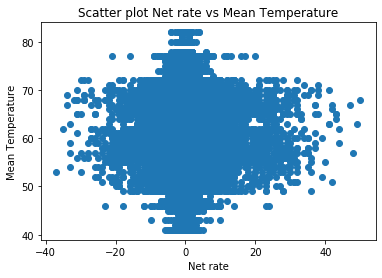

In [58]:
plt.scatter(trip_data_hour.net_rate, trip_data_hour['Mean TemperatureF'])
plt.xlabel('Net rate')
plt.ylabel('Mean Temperature')
plt.title('Scatter plot Net rate vs Mean Temperature')

Text(0.5, 1.0, 'Scatter plot Net rate vs Mean Sea Level PressureIn')

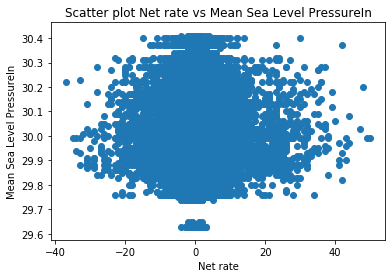

In [59]:
plt.scatter(trip_data_hour.net_rate, trip_data_hour['Mean Sea Level PressureIn'])
plt.xlabel('Net rate')
plt.ylabel('Mean Sea Level PressureIn')
plt.title('Scatter plot Net rate vs Mean Sea Level PressureIn')

The net rate distribution is similar for all towns except San Fracisco.

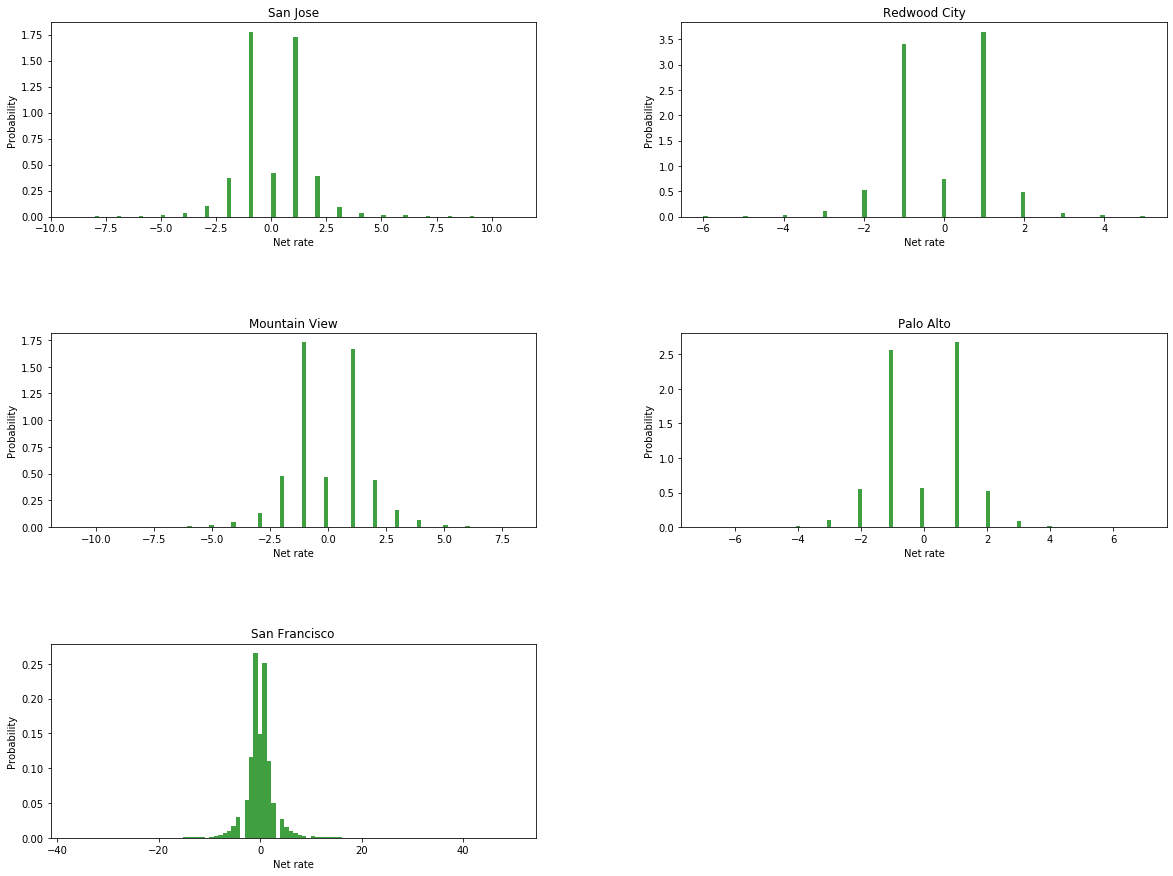

In [60]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(wspace=0.3, hspace=0.6)
fig.tight_layout()

i = 1
for city in station_data.City.unique():
    
    ax = fig.add_subplot(3, 2, i)
    n, bins, patches = plt.hist(trip_data_hour[trip_data_hour.City == city].net_rate, 100, 
                                density=True, facecolor='g', alpha=0.75)
    plt.xlabel('Net rate')
    plt.ylabel('Probability')
    plt.title(city)

    i = i + 1

In [61]:
from scipy.stats import kruskal

cities = ['San Francisco', 'San Jose', 'Redwood City', 'Mountain View', 'Palo Alto']

Francisco = trip_data_hour[trip_data_hour.City == 'San Francisco'].net_rate.tolist()
Jose = trip_data_hour[trip_data_hour.City == 'San Jose'].net_rate.tolist()
Redwood = trip_data_hour[trip_data_hour.City == 'Redwood City'].net_rate.tolist()
Mountain = trip_data_hour[trip_data_hour.City == 'Mountain View'].net_rate.tolist()
Palo = trip_data_hour[trip_data_hour.City == 'Palo Alto'].net_rate.tolist()
u_statistic, pVal = kruskal(Francisco, Jose, Redwood, Mountain, Palo)
print("P value of combined test " + str(pVal) + "\n")

n = len(cities)
for i in range(len(cities)):
    city_i = trip_data_hour[trip_data_hour.City == cities[i]].net_rate.tolist()
    for j in range(i+1,n):
        city_j = trip_data_hour[trip_data_hour.City == cities[j]].net_rate.tolist()
        print("Comparison between " + cities[i] + " vs " + cities[j])
        u_statistic, pVal = kruskal(city_i, city_j)
        print ('P value: ' + str(pVal))

P value of combined test 0.0

Comparison between San Francisco vs San Jose
P value: 1.0
Comparison between San Francisco vs Redwood City
P value: 0.0
Comparison between San Francisco vs Mountain View
P value: 1.0
Comparison between San Francisco vs Palo Alto
P value: 0.0
Comparison between San Jose vs Redwood City
P value: 0.5273103587774667
Comparison between San Jose vs Mountain View
P value: 0.9872236020880704
Comparison between San Jose vs Palo Alto
P value: 0.6738805896420872
Comparison between Redwood City vs Mountain View
P value: 0.5632587345852198
Comparison between Redwood City vs Palo Alto
P value: 0.8470040561298816
Comparison between Mountain View vs Palo Alto
P value: 0.7103361244459587


# Non time series model

we use latitude and longitude to account for the different stations and drop the station ID.  
We develop 2 models one for san Francisco and another for the other stations  

In [68]:
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor

from numpy import sort
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel

In [69]:
# Encoding cyclic feature
trip_data_hour['hour'] = np.sin(trip_data_hour.hour*(2.*np.pi/24))
trip_data_hour['day'] = np.sin(trip_data_hour.day*(2.*np.pi/7))
trip_data_hour['month'] = np.sin((trip_data_hour.month-1)*(2.*np.pi/12))

In [70]:
trip_data_hour = pd.get_dummies(trip_data_hour, columns=["Events"])

In [71]:
def group_city(x):
    if x != 'San Francisco':
        return "Others"
    else:
        return x

trip_data_hour["Region"] = trip_data_hour["City"].apply(lambda x: group_city(x))

In [72]:
def root_mean_squared_error(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

random_state = 12

In [73]:
cols_to_drop = ['City', 'Station', 'Date','Zip', 'Date_time', 'Date_str', 'Month', 'Weekday', 'Region']

numeric_cols =  ['Mean TemperatureF', 'Mean Humidity', 'Mean Sea Level PressureIn','Max Gust SpeedMPH','PrecipitationIn', 
                 'CloudCover', 'WindDirDegrees']

#numeric_cols =  ['Mean TemperatureF', 'Mean Humidity', 'Mean Sea Level PressureIn','Max VisibilityMiles','Min VisibilityMiles',
#                 'Max Wind SpeedMPH', 'Max Gust SpeedMPH','PrecipitationIn', 'CloudCover', 'WindDirDegrees']

# 'Min VisibilityMiles', 'Max Wind SpeedMPH', 'Max VisibilityMiles'

### San Francisco Model 

In [74]:
Francisco = trip_data_hour[trip_data_hour.Region == 'San Francisco']
Francisco = Francisco.drop(cols_to_drop, axis=1)
    
X = Francisco.drop(['net_rate'], axis=1)
y = Francisco.net_rate

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=random_state)

scaler = StandardScaler()
scaler.fit(Xtrain[numeric_cols])

Xtrain[numeric_cols] = scaler.transform(Xtrain[numeric_cols])
Xtest[numeric_cols] = scaler.transform(Xtest[numeric_cols])

In [75]:
regressors = [GradientBoostingRegressor, 
              RandomForestRegressor,
              Lasso, 
              LinearRegression, 
              Ridge, 
              LinearSVR, 
              SVR, 
              XGBRegressor]

X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=random_state)
    
rgs_dict = {}
for rgs in regressors:
    try:
        rgs_function = rgs(random_state=random_state) 
    except:
        rgs_function = rgs()
        
    model = rgs_function.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(root_mean_squared_error(y_pred, y_test))
    rgs_dict[rgs.__name__] = rmse

best_reg_model = min(rgs_dict, key = lambda x: rgs_dict.get(x))
print('The best regressor is {} with root mean squared error of {:.1f}.'.format(best_reg_model, rmse))

[08:36:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The best regressor is GradientBoostingRegressor with root mean squared error of 1.7.


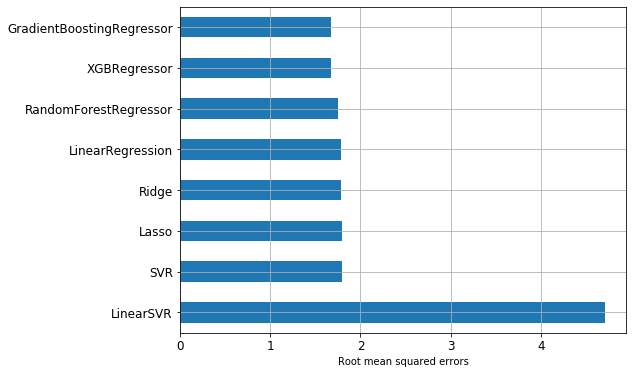

In [76]:
pd.Series(rgs_dict).sort_values(ascending=False).plot.barh(figsize=(8, 6), grid=True, fontsize=12)
plt.xlabel('Root mean squared errors')
plt.show()

In [77]:
rgs_dict

{'GradientBoostingRegressor': 1.6731854112836853,
 'RandomForestRegressor': 1.750585743055057,
 'Lasso': 1.7898739768329062,
 'LinearRegression': 1.788531542474649,
 'Ridge': 1.788588937335529,
 'LinearSVR': 4.706325684709363,
 'SVR': 1.7933953706454744,
 'XGBRegressor': 1.6745675487352671}

In [78]:
model = GradientBoostingRegressor(random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print("RMSE: %.2f" % rmse)

RMSE: 2.80


Text(0.5, 1.0, 'Features Importance')

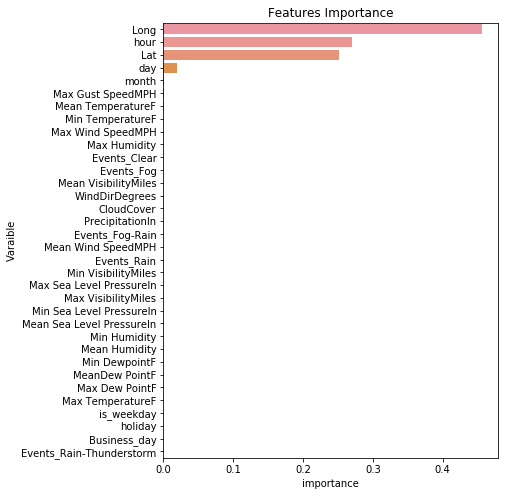

In [79]:
feature_importance = pd.DataFrame({'Varaible':X_train.columns,
                                   'importance':model.feature_importances_}).sort_values(by='importance', 
                                                                                         ascending=False)
plt.subplots(figsize=(6, 8))
sns.barplot(x="importance", y="Varaible", data=feature_importance)
plt.title('Features Importance')

In [80]:
thresholds = sort(model.feature_importances_)
thresholds = thresholds[::-1]
for thresh in thresholds:
    
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    selection_model = GradientBoostingRegressor(random_state=random_state)
    selection_model.fit(select_X_train, y_train)
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print("Thresh=%.3f, n=%d, RMSE: %.2f" % (thresh, select_X_train.shape[1], rmse))

Thresh=0.457, n=1, RMSE: 3.18
Thresh=0.271, n=2, RMSE: 2.81
Thresh=0.252, n=3, RMSE: 2.81
Thresh=0.019, n=4, RMSE: 2.79
Thresh=0.001, n=5, RMSE: 2.80
Thresh=0.000, n=6, RMSE: 2.80
Thresh=0.000, n=7, RMSE: 2.80
Thresh=0.000, n=8, RMSE: 2.80
Thresh=0.000, n=9, RMSE: 2.80
Thresh=0.000, n=10, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=34, RMSE: 2.80
Thresh=0.000, n=3

In [81]:
best_feat = feature_importance.Varaible[:4].values

In [82]:
gbr_params = {'learning_rate':[0.02, 0.05, 0.08], 
              'n_estimators':[150, 200, 250], 
              'min_samples_leaf':[3, 4, 5], 
              'max_depth':[8, 9, 10]
             }

nfolds = ShuffleSplit(n_splits=10, test_size = 0.20, random_state=random_state)

acc_scorer = make_scorer(root_mean_squared_error)
gbr = GradientBoostingRegressor(random_state=random_state)

grid = GridSearchCV(estimator = gbr, 
                    param_grid = gbr_params, 
                    scoring = acc_scorer, 
                    cv = nfolds, 
                    n_jobs=2, 
                    verbose=1)

grid.fit(Xtrain[best_feat], ytrain.values)
grid.best_estimator_

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 23.0min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 129.9min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 320.5min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 596.5min
[Parallel(n_jobs=2)]: Done 810 out of 810 | elapsed: 612.4min finished


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=12, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
SF_model =  GradientBoostingRegressor(random_state=random_state)
SF_model.fit(X[best_feat], y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=12, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
X_test['net_rate_pred'] = SF_model.predict(X_test[best_feat])

In [ ]:
#plt.figure(figsize=(15,5))
#plt.plot(X_test['2015-08-01':'2015-08-31'].net_rate_pred, "g", label="predicted")
#plt.plot(ts['2015-08-01':'2015-08-31'].net_rate, "b--", label="observed")

### Other regions Model 

In [86]:
cols_to_drop = ['City', 'Station', 'Date','Zip', 'Date_time', 'Date_str', 'Month', 'Weekday', 'Region']

Others = trip_data_hour[trip_data_hour.Region == 'Others']
Others = Others.drop(cols_to_drop, axis=1)
    
X = Others.drop(['net_rate'], axis=1)
y = Others.net_rate
Xtrain_O, Xtest_O, ytrain_O, ytest_O = train_test_split(X, y, test_size=0.2, random_state=random_state)

scaler = StandardScaler()
scaler.fit(Xtrain_O[numeric_cols])

Xtrain_O[numeric_cols] = scaler.transform(Xtrain_O[numeric_cols])
Xtest_O[numeric_cols] = scaler.transform(Xtest_O[numeric_cols])

In [87]:
Xtrain_O.head()

,Lat,Long,Business_day,holiday,is_weekday,hour,month,day,Max TemperatureF,Mean TemperatureF,...,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Events_Clear,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Thunderstorm
3039,37.329732,-121.901782,1,0,1,-1.000000,-5.000000e-01,0.781831,80.0,1.019337,...,6.0,-0.248090,-0.137200,0.554153,0.398883,1,0,0,0,0
20719,37.342725,-121.895617,1,0,1,-1.000000,1.000000e+00,-0.974928,64.0,-0.757396,...,10.0,0.926287,2.535473,1.497170,0.388321,0,0,0,1,0
3398,37.330698,-121.888979,1,0,1,-0.258819,-8.660254e-01,0.974928,67.0,-0.313212,...,4.0,-0.835278,-0.129101,1.968679,-2.093708,1,0,0,0,0
6359,37.333988,-121.894902,1,0,1,-0.965926,1.224647e-16,-0.433884,78.0,0.575154,...,7.0,0.534828,-0.137200,-1.331881,0.557311,1,0,0,0,0
618,37.329732,-121.901782,1,0,1,0.866025,-8.660254e-01,0.781831,69.0,-0.905457,...,3.0,-1.226737,-0.137200,-0.388864,-0.224265,1,0,0,0,0


In [88]:
regressors = [GradientBoostingRegressor, 
              RandomForestRegressor,
              Lasso, 
              LinearRegression, 
              SVR]

X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(Xtrain_O, 
                                                            ytrain_O, 
                                                            test_size=0.2, 
                                                            random_state=random_state)
    
rgs_dict_O = {}
for rgs in regressors:
    try:
        rgs_function = rgs(random_state=random_state) 
    except:
        rgs_function = rgs()
        
    model = rgs_function.fit(X_train_O, y_train_O.values)
    y_pred_O = model.predict(X_test_O)
    rmse_O = np.sqrt(root_mean_squared_error(y_pred_O, y_test_O))
    rgs_dict_O[rgs.__name__] = rmse_O
    
best_reg_model_O = min(rgs_dict_O, key = lambda x: rgs_dict_O.get(x))
print('The best regressor is {} with root mean squared error of {:.2f}.'.format(best_reg_model_O, rmse_O))

The best regressor is GradientBoostingRegressor with root mean squared error of 1.30.


In [89]:
rgs_dict_O

{'GradientBoostingRegressor': 1.1911111351085966,
 'RandomForestRegressor': 1.206944936596003,
 'Lasso': 1.226847341017288,
 'LinearRegression': 1.227930641011756,
 'SVR': 1.2999011459906848}

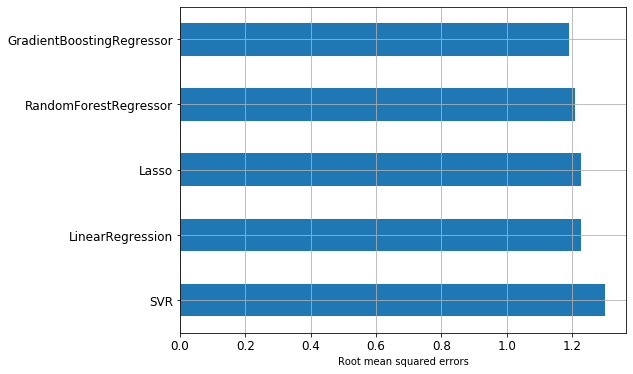

In [90]:
pd.Series(rgs_dict_O).sort_values(ascending=False).plot.barh(figsize=(8, 6), grid=True, fontsize=12)
plt.xlabel('Root mean squared errors')
plt.show()

In [91]:
from numpy import sort
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel

model = GradientBoostingRegressor(random_state=random_state)
X_train_O, X_test_O, y_train_O, y_test_O
model.fit(X_train_O, y_train_O)
y_pred = model.predict(X_test_O)
rmse = root_mean_squared_error(y_test_O, y_pred)

print("RMSE: %.2f" % rmse)

RMSE: 1.42


Text(0.5, 1.0, 'Features Importance')

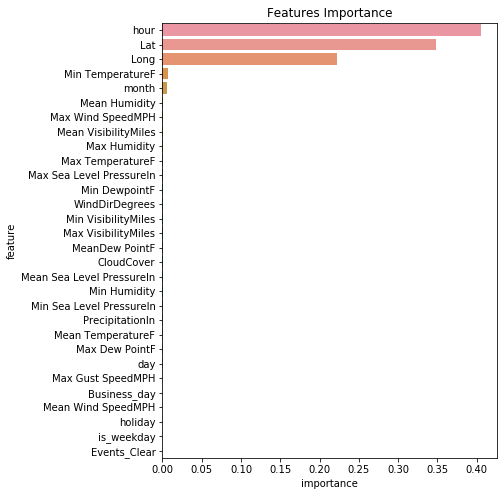

In [95]:
feature_importance = pd.DataFrame({'feature':X_train_O.columns,
                                   'importance':model.feature_importances_}).sort_values(by='importance', 
                                                                                         ascending=False)
plt.subplots(figsize=(6, 8))
sns.barplot(x="importance", y="feature", data=feature_importance.head(30))
plt.title('Features Importance')

In [96]:
thresholds = sort(model.feature_importances_)
thresholds = thresholds[::-1]
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_O)
    selection_model = GradientBoostingRegressor(random_state=random_state)
    selection_model.fit(select_X_train, y_train_O)
    select_X_test = selection.transform(X_test_O)
    y_pred = selection_model.predict(select_X_test)
    rmse = root_mean_squared_error(y_test_O, y_pred)
    print("Thresh=%.3f, n=%d, RMSE: %.2f" % (thresh, select_X_train.shape[1], rmse))

Thresh=0.406, n=1, RMSE: 1.51
Thresh=0.348, n=2, RMSE: 1.37
Thresh=0.222, n=3, RMSE: 1.38
Thresh=0.006, n=4, RMSE: 1.39
Thresh=0.006, n=5, RMSE: 1.39
Thresh=0.001, n=6, RMSE: 1.39
Thresh=0.001, n=7, RMSE: 1.38
Thresh=0.001, n=8, RMSE: 1.39
Thresh=0.001, n=9, RMSE: 1.39
Thresh=0.001, n=10, RMSE: 1.41
Thresh=0.001, n=11, RMSE: 1.41
Thresh=0.001, n=12, RMSE: 1.42
Thresh=0.001, n=13, RMSE: 1.42
Thresh=0.001, n=14, RMSE: 1.41
Thresh=0.001, n=15, RMSE: 1.42
Thresh=0.000, n=16, RMSE: 1.43
Thresh=0.000, n=17, RMSE: 1.42
Thresh=0.000, n=18, RMSE: 1.41
Thresh=0.000, n=19, RMSE: 1.41
Thresh=0.000, n=20, RMSE: 1.41
Thresh=0.000, n=21, RMSE: 1.42
Thresh=0.000, n=22, RMSE: 1.41
Thresh=0.000, n=23, RMSE: 1.41
Thresh=0.000, n=24, RMSE: 1.42
Thresh=0.000, n=25, RMSE: 1.42
Thresh=0.000, n=34, RMSE: 1.42
Thresh=0.000, n=34, RMSE: 1.42
Thresh=0.000, n=34, RMSE: 1.42
Thresh=0.000, n=34, RMSE: 1.42
Thresh=0.000, n=34, RMSE: 1.42
Thresh=0.000, n=34, RMSE: 1.42
Thresh=0.000, n=34, RMSE: 1.42
Thresh=0.000, n=3

In [97]:
best_feat = feature_importance.feature[:3]
best_feat

5    hour
0     Lat
1    Long
Name: feature, dtype: object

In [98]:
gbr_params = {'learning_rate':[0.02, 0.05, 0.08], 
              'n_estimators':[150, 200, 250], 
              'min_samples_leaf':[3, 4, 5], 
              'max_depth':[8, 9, 10]}

nfolds = ShuffleSplit(n_splits=10, test_size = 0.20, random_state=random_state)

acc_scorer = make_scorer(root_mean_squared_error)
gbr_others = GradientBoostingRegressor(random_state=random_state) 

grid = GridSearchCV(estimator = gbr_others, 
                    param_grid = gbr_params, 
                    scoring = acc_scorer, 
                    cv = nfolds, 
                    n_jobs=2, 
                    verbose=1)

grid.fit(X_train_O[best_feat], y_train_O.values)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  8.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 20.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 34.5min
[Parallel(n_jobs=2)]: Done 810 out of 810 | elapsed: 35.2min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=12, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 mi...
                                                 random_state=12, subsample=1.0,
                                                 tol=0.0001,
                     

In [99]:
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=12, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)